In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

from sklearn.preprocessing import OneHotEncoder


In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [26]:
print(type(x_train), type(y_train))
print((len(x_train), len(y_train)), (len(x_test), len(y_test)))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 60000) (10000, 10000)


In [27]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(np.expand_dims(y_train, axis=1))
y_train_encoded = encoder.transform(np.expand_dims(y_train, axis=1))
y_test_encoded = encoder.transform(np.expand_dims(y_test, axis=1))

y_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [28]:
model = Sequential()

# conv 1
model.add(Conv2D(filters=4, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=4, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D(strides=2))

# conv 2
model.add(Conv2D(filters=8, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(Conv2D(filters=8, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D(strides=2))

# conv 3
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D(strides=2))


model.add(Flatten())

# FC 1
model.add(Dense(units=144, activation="relu"))
model.add(Dropout(0.2))
# FC 2
model.add(Dense(units=144, activation="relu"))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=10, activation="softmax"))

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 4)         40        
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 4)         148       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 4)        0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 8)         296       
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 8)         584       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                  

In [30]:
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer="adam")

In [31]:
tf.random.set_seed(42)
history = model.fit(x_train, y_train_encoded, validation_split=0.2, batch_size=32, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3933 - acc: 0.8846 - val_loss: 0.1012 - val_acc: 0.9713
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1176 - acc: 0.9655 - val_loss: 0.0741 - val_acc: 0.9782
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0904 - acc: 0.9726 - val_loss: 0.0664 - val_acc: 0.9805
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0764 - acc: 0.9774 - val_loss: 0.0654 - val_acc: 0.9822
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0672 - acc: 0.9797 - val_loss: 0.0813 - val_acc: 0.9766


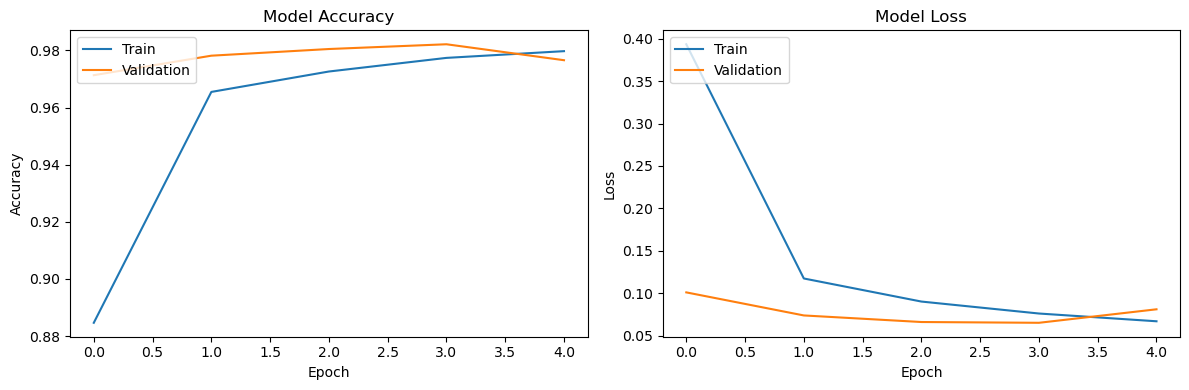

In [35]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [36]:
model.save("model.h5")